# Linear Regression

Linear regression is a linear approach to modelling the relationship between a output feature and one or more features which have a linear relationship with the output feature (also known as dependent and independent features).
 

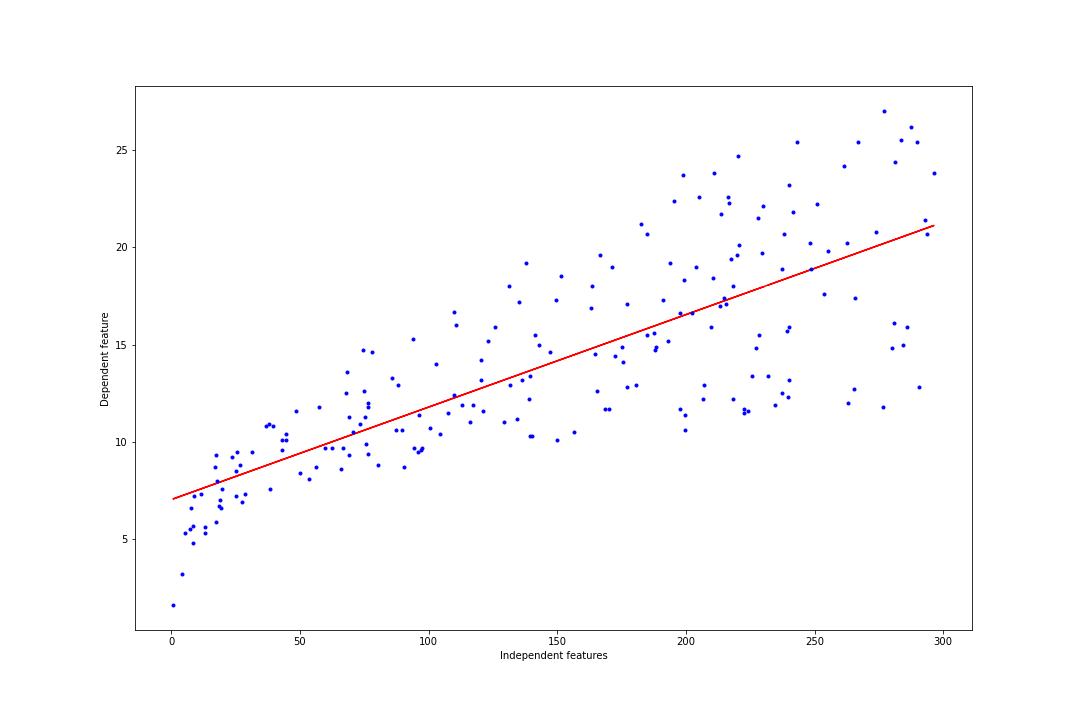

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### But how to use the relationship to predict the output?


<font size="3">1. In the case of **simple linear regression** we simply draw a line between the independent and dependent feature that represents that relationship and then for each data point on the X axis the corresponding point on the regression line will be our predicted output in the y axis.

mathematically the predictions made by a regression line can be found using the formula,</font>

$$y = \beta_0 + \beta_1 x$$

where,

- $y$ is the response or the target variable ( predicted value )
- $x$ is the independent feature
- $\beta_1$ is the coefficient of x ( slope : a number that describes both the direction and the steepness of the line )
- $\beta_0$ is the intercept ( an intercept is a point on the y-axis, through which the slope of the line passes )

<font size="3">2. In the case of **multiple linear regression** we also draw a line of sorts but when we have more then one feature then our regression line will be represented in higher dimensions (number_of_features + 1) dimension...

mathematically the predictions made by this regression line can be found using the formula:</font>

$$y = \beta_0  + \beta_1x_1  + \beta_2x_2 + .....  + \beta_nx_n$$

where,

- $y$ is the response or the target variable ( predicted value )
- $x_1,x_2,...,x_n$ are the independent features
- $\beta_1,\beta_2,...,\beta_n $ are the coefficient of each independent feature ( slope : a number that describes both the direction and the steepness of the line )
- $\beta_0$ is the intercept ( an intercept is a point on the y-axis, through which the slope of the line passes )


This can be written in a vectorized form as:

$$y = h_\theta (x) = θ · x$$

where,
• θ is the model’s parameter vector, containing the bias term $θ_0$ and the feature weights $θ_1$ to $θ_n.$

• x is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.

• θ · x is the dot product of the vectors θ and x, which is of course equal to 

$ θ_0 x_0 + θ_1 x_1 + θ_2 x2 + ⋯ + θ_n x_n.$

$ h_θ $ is the hypothesis function, using the model parameters θ 

Ofcourse our predictions won't be spot on, we will have some error so, to understand how well our regression line can predict the data we sum up the squares of errors all in our predicted data and take the mean of it, this is called the mean squared error (mse for short). we also use root mean squared error which is simply the the square root of mse

$$ MSE(X,h_\theta) = \frac{1}{m} \sum \limits _{i=1} ^{m}  (\theta^{T}X^{i} - y^{i})^2 $$

Our goal is to find $\hat\theta$ which is a vector of $\theta_0,\theta_1,...\theta_n$

There are 3 ways to find the $\hat\theta$ value:
- using the normal equation
- using the scipy.linalg.lstsq() function
- using gradient decent ( the one which we use )

You can really skip to gradient descent if you want, i went through it myself so i mentioned it

### 1. Normal equation

To calculate the value of $\hat\theta$ we will use a simple formula called the normal equation which minimizes the cost function

    To find the value of θ that minimizes the cost function, there is a closed-form solution
 —in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation

$$ \hat\theta = (X^T X)^T X^T y $$



In [ ]:
# read the data
df = pd.read_csv("../input/tvradionewspaperadvertising/Advertising.csv", usecols=['TV','Sales'])

# see top 5
df.head()

In [ ]:
# function to get θ

def get_thetaHat(X,y):
    # first add x0 = 1 to each instance
    X_b = np.c_[np.ones((200, 1)), X]
    # using the inv() from linear algebra module
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [ ]:
get_thetaHat(df['TV'],df['Sales'])

so, $\theta_0$ is 7.0326 and  $\theta_1$ is 0.04753664

These values won't be exact beacuse we will have some noise in the data but we can actually use these to predict the values of sales... lets try

In [ ]:
print(df.head(3), end='\n\n')

print('predicted: ',7.03259355 + 230.1*0.04753664)
print('predicted: ',7.03259355 + 33.5*0.04753664)
print('predicted: ',7.03259355 + 17.2*0.04753664)

# close enough, we know that it works

In [ ]:
# Lets plot it...

X = df['TV']
y = df['Sales']

y_predict = 7.03259355 + X*0.04753664

plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

## 2.  np.linalg.lstsq()

The LinearRegression class in scikit-learn is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”) so we can use it as well...

In [ ]:
X_b = np.c_[np.ones((200, 1)), X]
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

# same result

## 3. Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

gradient descent is faster then the normal equation when working on larger number of columns and is used a lot in a lot of algorithms

**Explanation:**

Gradient descent uses a cost function (cost simply means error... like MSE), the cost function tells how far are we from the coeffecients of independent features (slopes) and the intercept

The cost function is a partial derivative of the error function (eg: mse), it can be given for a single feature as:

$$ \frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum \limits _{i=1} ^{m}  (\theta^{T}X^{i} - y^{i})X_j^{i} $$

For multiple linear regression it can be given as:
$\delta$


when the cost function is calculated we multiply it with the learning rate. The learning rate tells the how fast we want to aim at the desired values and move towards them.


we maybe be calculating this value (cost function X learning rate) for a number of features. all the "learnt" values after calculation are subtracted with current slope values inorder to get their new slopes... ( when we start we select the slopes randomly and they after each iteration of the above steps converge to the most optimum values )

$$\theta^{next} = \theta^{now} - \ * \triangledown_\theta MSE (\theta)$$


Gradient descent is visually seen as a type of a bowl the point where the gradient descent is to have gotten the most optimum values of all slopes and the intercept is called the global minima (bottom most point in gradient descent)

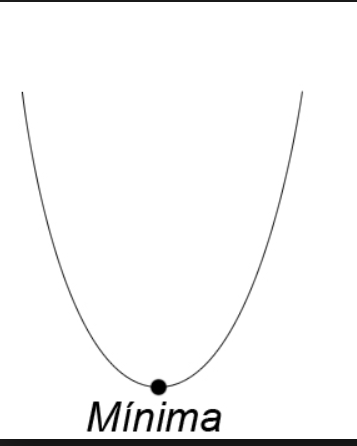

But as the residual's minima is dependent on two variables m and b, it becomes a _Paraboloid_ and the appropriate m and b are calculated using _*Gradient Descent*_ as shown below:
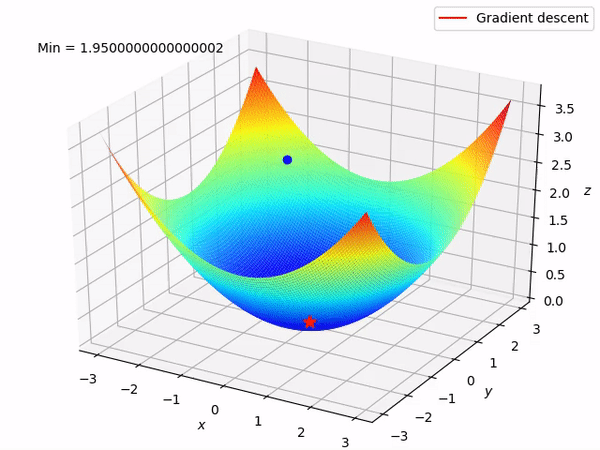
Photo:Google

<font size="3">Now, there are 3 types of gradient descents</font>

1. Batch gradient descent
    - In batch gradient descent we use the full training set in each iteration
2. Stochastic gradient descent
    - Stochatic gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.
3. mini batch gradient
    - Minibatch GD computes the gradients on small random sets of instances called minibatches

### Batch gradient

In [ ]:
# creating the data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

## Polynomial regression

In polynomial regression we use the concept of quadratic equation, that is we convert our data from 

$y = bx + c$

into the form

$y = ax^2 + bx + c$

this above example is for 2 degree polynomial when we only have a single independent feature. we are finding the square of the feature and adding it as another column in the data

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0],X_poly[0])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

## Regularization

regularization is used to reduce overfitting of regression models.

It is basically the idea that if we add a extra value to the cost function and there by increasing the cost then the model geenrated will not overfit our training data.

there are 3 types of regularizations:
1. Ridge regression
2. Lasso regression
3. Elastic Net

### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

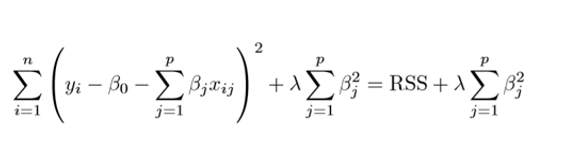

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
.
If we plot both the above equations, we get the following graph:


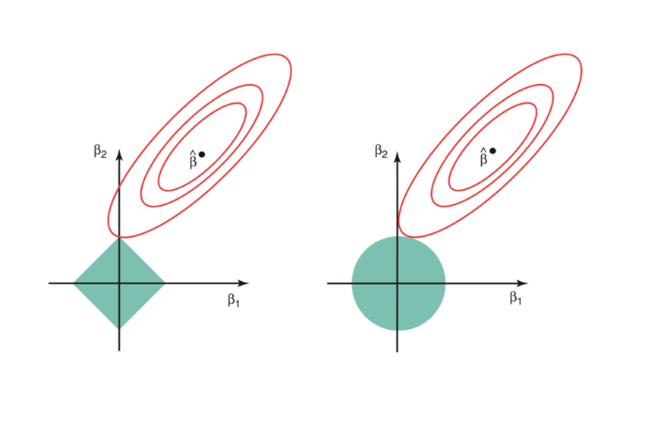
The red ellipse represents the cost function of the model, whereas the square (left side) represents the Lasso regression and the circle (right side) represents the Ridge regression.


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.4)   # using random alpha value for now
model.fit(X,y)
print(model.intercept_,model.coef_)

### LASSO (Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.
and hence the formula for loss after regularization is:

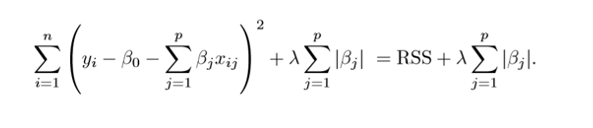


In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.4)    # using random alpha value for now
model.fit(X,y)
print(model.intercept_,model.coef_)

### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

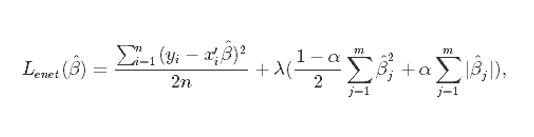
where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).


In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.4)    # using random alpha value for now
model.fit(X,y)
print(model.intercept_,model.coef_)

### Assumptions

Let’s see the underlying assumptions: -
* The regression model is linear in terms of coefficients and error term.
* The mean of the residuals is zero.
* The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.
* The independent variables(x) are uncorrelated with the residual term, also termed as **exogeneity**. This, in layman term, generalises that in no way should the error term be predicted given the value of independent variables.
* The error terms have a constant variance, i.e. **homoscedasticity**.
* No Multicollinearity, i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.
* The error terms are normally distributed.


### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :

$$R^2 = \frac{TSS - RSS}{TSS}$$

where,

$RSS = \sum (y_i - \hat y)^2$

    - where $\hat y$ is y predicted
    
$TSS = \sum (y_i - y^-)^2$

    - where $y^- $ is y mean
    

### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:

$$R^2 adjusted = \frac{(1-R^2)(N-1)}{N-P-1}$$

**There is a lot more to cover and i have the idea of showing a sequence of steps to be taken to approach and Linear regression problem but i'm done for today**

sources:
- Hands-On Machine Learning with Scikit-Learn and TensorFlow
- ineuron's course material
- my brain

## Thank you

### Don't forget to leave a like/upvote if this was worth your time